##  Exercise 1:
Discuss what other classes we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...

In [1]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

In [2]:
#trying to add actors wwho played in the shows.
class Persons:
    def __init__(self):
        self.id = ""
        self.name= ""
        self.link = generic_image
    def actor(self):
        print(f"{self.name} played in this movie or tv series.")
        display(Image(self.link))

In [3]:
# Show the airdates of the shows and what season.
class Dates:
    def __init__(self):
        self.name = ""
        self.season = ""
        self.airdate = ""
        
    def Ep(self):
        print(f"This was the {self.name} episode.")
        
    def seasons(self):
        print(f"This episode is in the {self.season} season. ")
    def air(self):
        print(f"This {self.name} in the {self.season} season released in {self.airdate}.")
        

In [4]:
class Video:
    def __init__(self):
        self.title = ""
        self.length = timedelta()
        self.link = generic_image
        
    def play(self):
        print(f"Now playing {self.title}")
        display(Image(self.link))
        
    def pause(self):
        print("Video Paused")
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long."

In [5]:
class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data["runtime"])
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image

In [6]:
class Series:
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
        
    def get_info(self, query = ''):
        data = None #<-- in case the show doesn't come back
        while not data:
            if not query: 
                query = input("What is the name of the series? ")
                r = requests.get(f"https://api.tvmaze.com/singlesearch/shows?q={query}")
                if r.status_code == 200:
                    data = r.json()
                else:
                    print(f"Series Error: status code: {r.status_code}")
                    query = ''
            elif query:
                r = requests.get(f"https://api.tvmaze.com/singlesearch/shows?q={query}")
                if r.status_code == 200:
                    data = r.json()
                else:
                    print(f"Series Error: status code: {r.status_code}")
                    query = ''
             
        #use data to build attributes
        self.id = data['id']
        self.title = data['name']
        self.summary = data['summary']
        self.genres = data['genres']
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
            
        #API call for Episodes
        r = requests.get(f"https://api.tvmaze.com/shows/{self.id}/episodes")
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"episode error: status code {r.status_code}")
            return
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        print(f"{self.title} has {len(self.episodes)} episodes.")
        
    def play_series(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? y/N")
                if watching.lower().strip() not in ('yes', 'y'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
            
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"

Hunter x Hunter has 148 episodes.
Now playing Departure x And x Friends


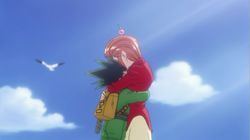

Now playing Test x Of x Tests


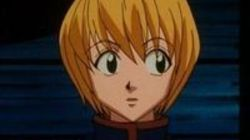

Now playing Rivals x For x Survival


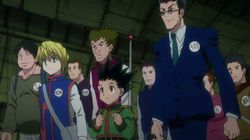

In [7]:
first_show = Series()
first_show.get_info()
first_show.play_series()
first_show = Persons()
first_show = Dates()